Colab notebook for the cration of an image classifier with a CNN using keras and their fashion mnist dataset
Label    Description
0        T-shirt/top
1        Trouser
2        Pullover
3        Dress
4        Coat
5        Sandal
6        Shirt
7        Sneaker
8        Bag
9        Ankle boot

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [23]:
import matplotlib.pyplot as plt

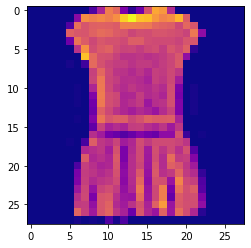

In [24]:
plt.imshow(X_train[3],cmap="plasma")

In [25]:
X_train.max()

255

In [26]:
X_train = X_train/255

In [27]:
X_test = X_test/255

In [28]:
X_train = X_train.reshape((60000,28,28,1))

In [29]:
X_test = X_test.reshape((10000,28,28,1))

To convert the y columns to categorical date the to_categorical function must be used

In [30]:
from tensorflow.keras.utils import to_categorical

In [31]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [32]:
y_cat_train.shape

(60000, 10)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten
from tensorflow.config import run_functions_eagerly

In [34]:
run_functions_eagerly(True)

In [35]:
model = Sequential()

model.add(Conv2D(filters = 32,kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               589952    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
________________________________________________

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [62]:
callback1 = EarlyStopping(monitor="val_accuracy", mode='max', patience=3)

Now the neural network will be fitted to the dataset

In [39]:
model.fit(X_train, y_cat_train, epochs=25,validation_data=(X_test, y_cat_test), callbacks=[callback1])

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1875/1875 [==============================] - 99s 53ms/step - loss: 0.4026 - accuracy: 0.8569 - val_loss: 0.3142 - val_accuracy: 0.8840
Epoch 2/25
1875/1875 [==============================] - 97s 52ms/step - loss: 0.2774 - accuracy: 0.9002 - val_loss: 0.2931 - val_accuracy: 0.8964
Epoch 3/25
1875/1875 [==============================] - 95s 51ms/step - loss: 0.2395 - accuracy: 0.9143 - val_loss: 0.2752 - val_accuracy: 0.9011
Epoch 4/25
1875/1875 [==============================] - 95s 51ms/step - loss: 0.2140 - accuracy: 0.9234 - val_loss: 0.2969 - val_accuracy: 0.9017
Epoch 5/25
1875/1875 [==============================] - 92s 49ms/step - loss: 0.1963 - accuracy: 0.9297 - val_loss: 0.2843 - val_accuracy: 0.9055
Epoch 6/25
1875/1875 [==============================] - 92s 49ms/step - loss: 0.1831 - accuracy: 0.9346 - val_loss: 0.2829 - val_accuracy: 0.9086
Epoch 7/25
1875/1875 [==============================] - 90s 48ms/step - loss: 0.1709 - accuracy: 0.9402 - val_loss: 0.3099 - val_accura

In [40]:
metrics = pd.DataFrame(model.history.history)

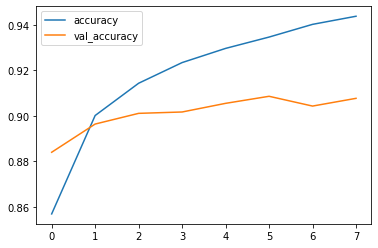

In [41]:
metrics[['accuracy','val_accuracy']].plot()

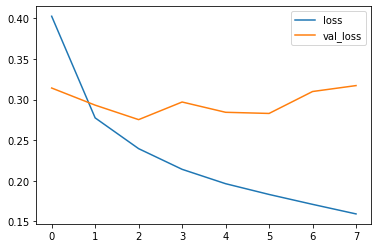

In [42]:
metrics[['loss','val_loss']].plot()

By this graph, the better metrics for the earlystopper to use is the validation loss

In [61]:
callback2 = EarlyStopping(monitor="val_loss", mode='min', patience=3)

In [44]:
model = Sequential()

model.add(Conv2D(filters = 32,kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [46]:
model.fit(X_train, y_cat_train, epochs=25,validation_data=(X_test, y_cat_test), callbacks=[callback2])

Epoch 1/25
   1/1875 [..............................] - ETA: 1:50 - loss: 2.3424 - accuracy: 0.0625

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1875/1875 [==============================] - 95s 51ms/step - loss: 0.3991 - accuracy: 0.8568 - val_loss: 0.3327 - val_accuracy: 0.8851
Epoch 2/25
1875/1875 [==============================] - 89s 48ms/step - loss: 0.2760 - accuracy: 0.9007 - val_loss: 0.3007 - val_accuracy: 0.8918
Epoch 3/25
1875/1875 [==============================] - 91s 49ms/step - loss: 0.2370 - accuracy: 0.9146 - val_loss: 0.2858 - val_accuracy: 0.8985
Epoch 4/25
1875/1875 [==============================] - 89s 48ms/step - loss: 0.2133 - accuracy: 0.9239 - val_loss: 0.2834 - val_accuracy: 0.9050
Epoch 5/25
1875/1875 [==============================] - 92s 49ms/step - loss: 0.1946 - accuracy: 0.9306 - val_loss: 0.2717 - val_accuracy: 0.9087
Epoch 6/25
1875/1875 [==============================] - 88s 47ms/step - loss: 0.1813 - accuracy: 0.9354 - val_loss: 0.2801 - val_accuracy: 0.9066
Epoch 7/25
1875/1875 [==============================] - 90s 48ms/step - loss: 0.1675 - accuracy: 0.9409 - val_loss: 0.3195 - val_accura

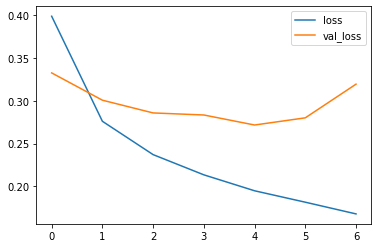

In [47]:
metrics = pd.DataFrame(model.history.history)
metrics[['loss','val_loss']].plot()

In [48]:
from tensorflow.keras.layers import Dropout

In [49]:
X_test[0].shape

(28, 28, 1)

If the net is made deeper, maybe will improve the model

In [65]:
model = Sequential()

model.add(Conv2D(filters = 32 ,kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(.8))

model.add(Flatten())

model.add(Dense(80, activation='relu'))
model.add(Dropout(.5))

model.add(Dense(60, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [66]:
model.fit(X_train, y_cat_train, batch_size=512,epochs=25,validation_data=(X_test, y_cat_test), callbacks=[callback1, callback2])

Epoch 1/25
118/118 [==============================] - 38s 320ms/step - loss: 0.9011 - accuracy: 0.6716 - val_loss: 0.5639 - val_accuracy: 0.7732
Epoch 2/25
118/118 [==============================] - 38s 322ms/step - loss: 0.5766 - accuracy: 0.7909 - val_loss: 0.4536 - val_accuracy: 0.8416
Epoch 3/25
118/118 [==============================] - 38s 323ms/step - loss: 0.5078 - accuracy: 0.8169 - val_loss: 0.4120 - val_accuracy: 0.8467
Epoch 4/25
118/118 [==============================] - 37s 312ms/step - loss: 0.4745 - accuracy: 0.8298 - val_loss: 0.3737 - val_accuracy: 0.8648
Epoch 5/25
118/118 [==============================] - 37s 312ms/step - loss: 0.4543 - accuracy: 0.8379 - val_loss: 0.3784 - val_accuracy: 0.8600
Epoch 6/25
118/118 [==============================] - 38s 322ms/step - loss: 0.4344 - accuracy: 0.8461 - val_loss: 0.3564 - val_accuracy: 0.8728
Epoch 7/25
118/118 [==============================] - 37s 314ms/step - loss: 0.4241 - accuracy: 0.8479 - val_loss: 0.3356 - val_ac

In [67]:
loss = pd.DataFrame(model.history.history)

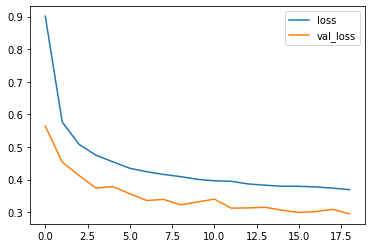

In [69]:
loss[['loss','val_loss']].plot()

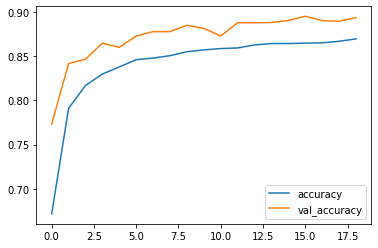

In [70]:
loss[['accuracy','val_accuracy']].plot()

In [71]:
from sklearn.metrics import classification_report, confusion_matrix

The dropout layers, the reduction of the kernel size, and the addition of an extra hidden layer underfitted the model for better prediction accuracy on the test dataset

In [72]:
predictions = model.predict(X_test)

 11/313 [>.............................] - ETA: 3s

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


313/313 [==============================] - 4s 14ms/step


In [73]:
for p in predictions:
  for j in range(len(p)):
    if p[j] == p.max():
      p[j] = 1
    else:
      p[j] = 0

In [74]:
predictions[:20]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [75]:
print(classification_report(y_cat_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.86      0.81      0.83      1000
           3       0.86      0.93      0.89      1000
           4       0.80      0.85      0.82      1000
           5       0.98      0.98      0.98      1000
           6       0.72      0.68      0.70      1000
           7       0.93      0.97      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.97      0.95      0.96      1000

   micro avg       0.89      0.89      0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000
 samples avg       0.89      0.89      0.89     10000



The model has a good perfomance overall, except for predicting if an object is a shirt, all the f1_score are above .7, so confidently one can say that the model is predicting something instead of being random choices, especially for clothes that are not weared in the tors0 i.e. ankle boot, bag, trouser, and its logical because there are not possible conflicting labels, but for pullover, dress, coat, and specially shirt which was the worst predicted label by model, and that makes sense because all of them are similiar if not very similar, confusing the CNN
